# Proyek Analisis Data: Bike Sharing Dataset
- Nama: I GEDE KADEK RESTU KARTANA WAISNAWA
- Email: restuwaisnawa@gmail.com
- Id Dicoding: restuwaisnawa

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan rental sepeda dalam dua terakhir?
- Pada musim apa sepeda paling banyak dan paling sedikit dirental?
- Apakah pengaruh cuaca terhadap total sepeda yang dirental?
- Jam berapa sepeda paling banyak disewa pada hari kerja dan hari libur?

## Menyaipkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Diimport dua buah data dari bike sharing dataset yaitu `day.csv` dan `hour.csv`

In [2]:
day_df = pd.read_csv("data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

##### `day_df` Data Type Check 

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Setelah dilakukan pengecekan terdapat 1 kesalahan terhadap data type. Pada column dteday (object ==> datetime)

##### `day_df` Missing Value Check

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan adanya missing value pada data `day_df`

##### `day_df` Data Duplicate Check

In [6]:
print("Jumlah data duplikat: ", day_df.duplicated().sum())

Jumlah data duplikat:  0


##### `day_df` Statistic Value Check

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Setelah dilakukan pengecekan, tidak ditemukan adanya keanehan pada nilai statistik data

#### Menilai tabel `hour_df`

##### `hour_df` Data Type Check 

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti tabel `day_df`, setelah dilakukan pengecekan terdapat 1 kesalahan terhadap data type. Pada column dteday (object ==> datetime)

##### `hour_df` Missing Value Check

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan adanya missing value pada data `hour_df`

##### `hour_df` Data Duplicate Check

In [10]:
print("Jumlah data duplikat: ", hour_df.duplicated().sum())

Jumlah data duplikat:  0


##### `hour_df` Statistic Value Check

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Setelah dilakukan pengecekan, tidak ditemukan adanya keanehan pada nilai statistik data

### Cleaning Data

#### Membersihkan tabel `day_df`

##### Menghapus beberapa kolom yang tidak dibutuhkan

In [12]:
day_col_drop = ['windspeed', 'weekday']
day_df.drop(day_col_drop, axis=1, inplace=True)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,1,1,0.226957,0.229270,0.436957,82,1518,1600


Beberapa column dihapus karena tidak diperlukan dalam analisa pertanyaan bisnis yang telah ditetapkan
- windspeed: berisi informasi kecepatan angin dan tidak dibutuhkan untuk analisa
- weekday: berisi informasi tentang hari dari data dan tidak dibutuhkan dalam analisa karena sudah ada nilai workingday dan holiday

##### Merubah penamaan kolom

In [13]:
day_df.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'weathersit' : 'weather',
    'cnt' : 'total'
}, inplace=True)

day_df.head()

,instant,date,season,year,month,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,1,1,0.226957,0.229270,0.436957,82,1518,1600


Penamaan kolom diubah untuk memudahkan proses analisa data

##### Mapping nilai kolom berupa angka menjadi keterangan

In [14]:
#mapping kolom season
mapping_season = {
    1: 'springer', 2: 'summer',
    3: 'fall', 4: 'winter'
}
day_df['season'] = day_df['season'].map(mapping_season)

#mapping kolom tahun
mapping_year = {0: 2011, 1: 2012}
day_df['year'] = day_df['year'].map(mapping_year)

#mapping kolom bulan
mapping_month = {
    1: 'Jan', 2: 'Feb', 3: 'Mar',
    4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep',
    10: 'Oct', 11: 'Nov', 12: 'Dec'   
}
day_df['month'] = day_df['month'].map(mapping_month)

#mapping kolom weather
mapping_weather = {
    1: 'Clear', 2: 'Mist',
    3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'
}
day_df['weather'] = day_df['weather'].map(mapping_weather)


day_df.head()

,instant,date,season,year,month,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,springer,2011,Jan,0,0,Mist,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,springer,2011,Jan,0,0,Mist,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,springer,2011,Jan,0,1,Clear,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,springer,2011,Jan,0,1,Clear,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,springer,2011,Jan,0,1,Clear,0.226957,0.229270,0.436957,82,1518,1600


Mapping nilai pada beberapa kolom data saya lakukan untuk  mempermudah analisa data dan visualisasi data nantinya

##### Memperbaiki tipe data

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   date        731 non-null    object 
 2   season      731 non-null    object 
 3   year        731 non-null    int64  
 4   month       731 non-null    object 
 5   holiday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weather     731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  total       731 non-null    int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 80.1+ KB


In [16]:
#merubah tipe data kolom ke datetime
day_df["date"] = pd.to_datetime(day_df["date"])

#merubah tipe data kolom ke category
day_df['season'] = day_df['season'].astype('category')
day_df['year'] = day_df['year'].astype('category')
day_df['month'] = day_df['month'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weather'] = day_df['weather'].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  total       731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 51.2 KB


Data type pada column `date` sudah diubah menjadi datetime64[ns]. Beberapa kolom dengan tipe data `object` dan `int64` diubah menjadi `category` karena merupakan data dengan nilai yang berulang sehingga dapat menghemat memori dan meningkatkan efisiensi eksekusi program

#### Membersihkan tabel `hour_df`

##### Menghapus beberapa kolom yang tidak dibutuhkan

In [17]:
hour_col_drop = ['windspeed', 'weekday']
hour_df.drop(hour_col_drop, axis=1, inplace=True)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,0,1,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,1,0,1,2,0,0,1,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,1,0,1,3,0,0,1,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,1,0,1,4,0,0,1,0.24,0.2879,0.75,0,1,1


Sama seperti data sebelumnya, beberapa column dihapus karena tidak diperlukan dalam analisa pertanyaan bisnis yang telah ditetapkan:
- windspeed: berisi informasi kecepatan angin dan tidak dibutuhkan untuk analisa
- weekday: berisi informasi tentang hari dari data dan tidak dibutuhkan dalam analisa karena sudah ada nilai workingday dan holiday

##### Merubah penamaan kolom

In [18]:
hour_df.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weathersit' : 'weather',
    'cnt' : 'total'
}, inplace=True)

hour_df.head()

,instant,date,season,year,month,hour,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,0,1,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,1,0,1,2,0,0,1,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,1,0,1,3,0,0,1,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,1,0,1,4,0,0,1,0.24,0.2879,0.75,0,1,1


Penamaan kolom diubah untuk memudahkan proses analisa data

##### Mapping nilai kolom berupa angka menjadi keterangan

In [19]:
hour_df['season'] = hour_df['season'].map(mapping_season)
hour_df['year'] = hour_df['year'].map(mapping_year)
hour_df['month'] = hour_df['month'].map(mapping_month)
hour_df['weather'] = hour_df['weather'].map(mapping_weather)

hour_df.head()

,instant,date,season,year,month,hour,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,springer,2011,Jan,0,0,0,Clear,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,springer,2011,Jan,1,0,0,Clear,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,springer,2011,Jan,2,0,0,Clear,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,springer,2011,Jan,3,0,0,Clear,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,springer,2011,Jan,4,0,0,Clear,0.24,0.2879,0.75,0,1,1


Mapping nilai pada beberapa kolom data saya lakukan untuk  mempermudah analisa data dan visualisasi data nantinya

##### Memperbaiki tipe data

In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   year        17379 non-null  int64  
 4   month       17379 non-null  object 
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weather     17379 non-null  object 
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  total       17379 non-null  int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 2.0+ MB


In [21]:
#merubah tipe data kolom ke datetime
hour_df["date"] = pd.to_datetime(hour_df["date"])

#merubah tipe data kolom ke category
hour_df['season'] = hour_df['season'].astype('category')
hour_df['year'] = hour_df['year'].astype('category')
hour_df['month'] = hour_df['month'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weather'] = hour_df['weather'].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  total       731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 51.2 KB


Data type pada column `date` sudah diubah menjadi datetime64[ns]. Beberapa kolom dengan tipe data `object` dan `int64` diubah menjadi `category` karena merupakan data dengan nilai yang berulang sehingga dapat menghemat memori dan meningkatkan efisiensi eksekusi program

## Exploratory Data Analysis (EDA)

### Explore tabel `day_df`

##### Eksplore jumlah total rental setiap bulan

In [22]:
day_df.groupby(by=['year', 'month']).agg({
    'total': ['sum', 'max', 'min', 'mean']
})

total                         
               sum   max   min         mean
year month                                 
2011 Apr     94870  5312   795  3162.333333
     Aug    136691  5895  1115  4409.387097
     Dec     87323  3940   705  2816.870968
     Feb     48215  2927  1005  1721.964286
     Jan     38189  1985   431  1231.903226
     Jul    141341  6043  3285  4559.387097
     Jun    143512  5515  3767  4783.733333
     Mar     64045  3239   605  2065.967742
     May    135821  5805  2633  4381.322581
     Nov    102167  4486  1495  3405.566667
     Oct    123511  5511   627  3984.225806
     Sep    127418  5423  1842  4247.266667
2012 Apr    174224  7460  1027  5807.466667
     Aug    214503  7865  4549  6919.451613
     Dec    123713  6606   441  3990.741935
     Feb    103137  5062  1529  3556.448276
     Jan     96744  4521  1301  3120.774194
     Jul    203607  8173  4459  6567.967742
     Jun    202830  8120  4127  6761.000000
     Mar    164875  8362  3194  5318.548387
     May    195865  8294  2843  6318.225806
     Nov    152664  6852  2277  5088.800000
     Oct    198841  8156    22  6414.225806
     Sep    218573  8714  4073  7285.766667

berdasarkan pada data diatas didapatkan beberapa insight:
- pada tahun 2011, total penyewaan sepeda tertinggi pada bulan Juni. Sedangkan total penyewaan sepeda terendah pada bulan Januari
- pada tahun 2012, total penyewaan sepeda tertinggi pada bulan september. Sedangkan total penyewaan sepeda terendah pada bulan Januari

In [23]:
day_df_total_bulanan = day_df.groupby(by='month').agg({
    'total': ['sum', 'max', 'min', 'mean']
})
day_df_total_bulanan.columns = day_df_total_bulanan.columns.droplevel(0)
day_df_total_bulanan.sort_values(by='sum', ascending=False)

,sum,max,min,mean
month,,,,
Aug,351194,7865,1115,5664.419355
Jun,346342,8120,3767,5772.366667
Sep,345991,8714,1842,5766.516667
Jul,344948,8173,3285,5563.677419
May,331686,8294,2633,5349.774194
Oct,322352,8156,22,5199.225806
Apr,269094,7460,795,4484.900000
Nov,254831,6852,1495,4247.183333
Mar,228920,8362,605,3692.258065


Namun apabila dilihat dari data 2 tahun terakhir, Agustus menjadi bulan dengan total penyewaan terbanyak, dilanjutkan dengan bulan Juni dan September.

##### Eksplore jumlah total rental pada setiap musim

In [24]:
day_df.groupby(by='season').agg({
    'total': ['sum', 'max', 'min', 'mean'],
    'temp' : ['mean', 'max', 'min', 'std'],
    'atemp': ['mean', 'max', 'min', 'std'],
    'hum' : ['mean', 'max', 'min', 'std'],
})

total                               temp                      \
              sum   max   min         mean      mean       max       min   
season                                                                     
fall      1061129  8714  1115  5644.303191  0.706309  0.861667  0.469167   
springer   471348  7836   431  2604.132597  0.297748  0.572500  0.059130   
summer     918589  8362   795  4992.331522  0.544405  0.808333  0.253043   
winter     841613  8555    22  4728.162921  0.422906  0.657500  0.220833   

                       atemp                                     hum  \
               std      mean       max       min       std      mean   
season                                                                 
fall      0.070848  0.655898  0.840896  0.242400  0.072056  0.633482   
springer  0.102735  0.296914  0.548617  0.079070  0.099026  0.582903   
summer    0.122650  0.520307  0.757579  0.250339  0.108022  0.626948   
winter    0.107834  0.415539  0.607975  0.227913  0.095536  0.668719   

                                        
               max       min       std  
season                                  
fall      0.939565  0.360000  0.119349  
springer  0.948261  0.000000  0.151880  
summer    0.922500  0.254167  0.152841  
winter    0.972500  0.333478  0.131248

In [25]:
day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

,season,registered,casual
0,fall,835038,226091
1,springer,410726,60622
2,summer,715067,203522
3,winter,711831,129782


pada tabel tersebut didapatkan beberapa insight mengenai musim:
- penyewaan terbanyak: Fall, penyewaan tersedikit: springer, dengan rata rata penyewaan terbanyak terjadi pada musim fall
- suhu rata-rata dari tinggi ke rendah: `fall => summer => winter => springer`
- rata-rata suhu yang dirasakan dari tinggi ke rendah: `fall => summer => winter => springer`
- kelembaban rata-rata dari tinggi ke rendah: `winter => fall => summer => springer`

##### Eksplore pengaruh cuaca terhadap jumlah total rental

In [26]:
day_df.groupby(by='weather').agg({
    'total': ['sum', 'max', 'min', 'mean']
})

total                        
                     sum   max  min         mean
weather                                         
Clear            2257952  8714  431  4876.786177
Light Rain/Snow    37869  4639   22  1803.285714
Mist              996858  8362  605  4035.862348

In [27]:
day_df.groupby('weather')[['registered', 'casual']].sum().reset_index()

,weather,registered,casual
0,Clear,1811606,446346
1,Light Rain/Snow,33974,3895
2,Mist,827082,169776


berdasarkan pada data tersebut terlihat bahwa penyewaan terbanyak terjadi ketika cuaca sedang cerah dengan angka peminjaman yang jauh lebih tinggi daripada keadaan cuaca yang lain. 

### Explore tabel `hour_df`

##### Eksplore jumlah total rental tiap jam pada hari kerja

In [28]:
filter_workingday = hour_df[(hour_df["workingday"] == 1)]
hour_df_workingday = filter_workingday.groupby(by='hour').agg({
    'total': ['sum', 'max', 'min', 'mean']
})
hour_df_workingday.columns = hour_df_workingday.columns.droplevel(0)
hour_df_workingday.sort_values(by='sum', ascending=False)

,sum,max,min,mean
hour,,,,
17,262120,976,26,525.290581
18,245129,977,26,492.226908
8,236595,839,31,477.006048
19,173504,743,18,348.401606
16,146268,634,13,293.122244
7,144144,596,18,290.612903
20,124360,567,23,249.718876
9,119793,426,23,241.518145
15,100263,601,13,201.331325


tabel data tersebut menunjukkan pada hari kerja (tidak termasuk hari libur), dalam 2 tahun terakhir total penyewaan sepeda terbanyak terjadi pada sore hari berkisar pada pukul 16.00 - 20.00 dan pada pagi hari berkisar pukul 07.00 - 09.00

##### Eksplore jumlah total rental tiap jam pada hari libur

In [29]:
filter_holiday = hour_df[(hour_df["holiday"] == 1)|(hour_df["workingday"] == 0)]
hour_df_holiday = filter_holiday.groupby(by='hour').agg({
    'total': ['sum', 'max', 'min', 'mean']
})
hour_df_holiday.columns = hour_df_holiday.columns.droplevel(0)
hour_df_holiday.sort_values(by='sum', ascending=False)

,sum,max,min,mean
hour,,,,
13,86101,760,30,372.731602
12,84606,776,32,366.259740
14,84233,750,23,364.645022
15,82886,750,7,358.813853
16,81480,783,11,352.727273
17,74740,731,15,323.549784
11,72838,663,27,315.316017
18,64643,676,23,281.056522
10,59115,539,12,255.909091


berbeda dengan hari kerja, pada hari libur dalam data 2 tahun terakhir menunjukkan bahwa total penyewaan sepeda terbanyak terjadi pada siang hingga sore hari bekisar pada pukul 12.00 - 16.00 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan rental sepeda dalam dua tahun terakhir?

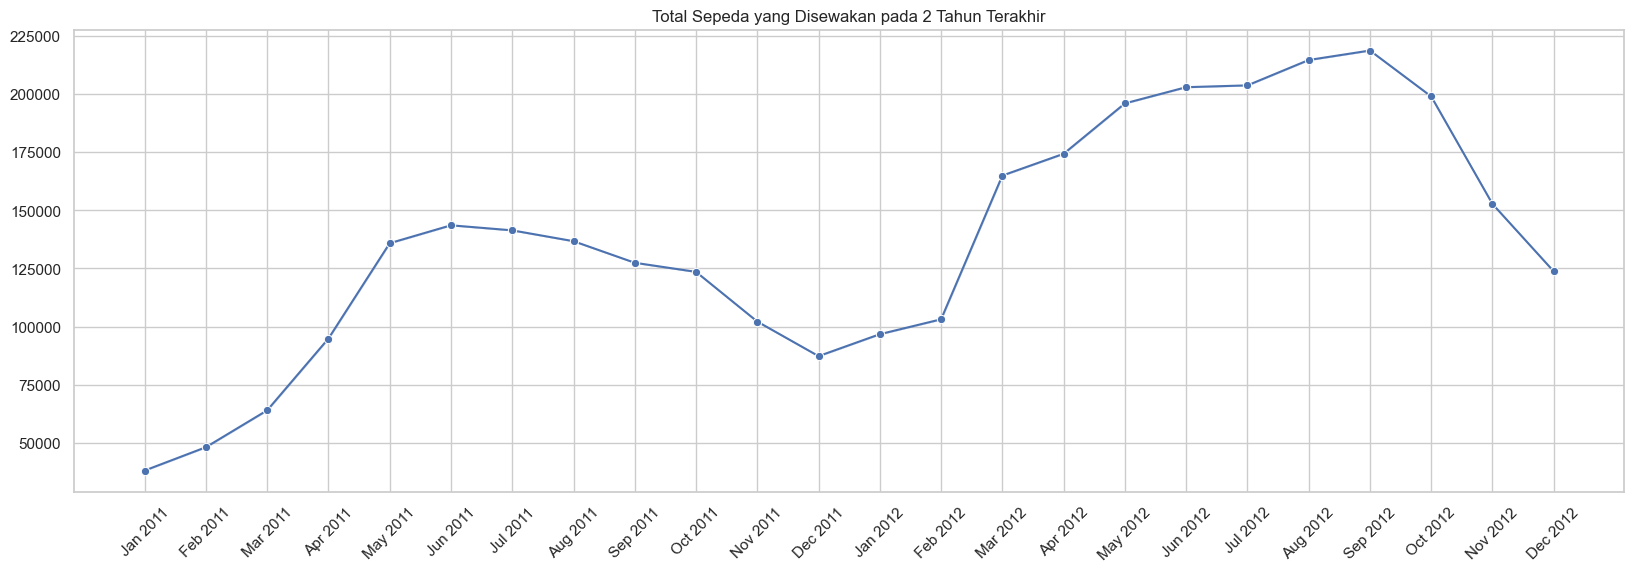

In [30]:
#menggganti datatype untuk merge kolom
plot_month = day_df['month'].astype(str)
plot_year = day_df['year'].astype(str)

#merging kolom month dan year untuk plot
day_df['year_month'] = plot_month + ' ' + plot_year

# membuat kolom berisi sum data kolom 'total' untuk setiap 'year_month'
day_df['total_sum'] = day_df.groupby('year_month')['total'].transform('sum')

# membuat line chart
plt.figure(figsize=(20, 6))
sns.set(style='whitegrid')
sns.lineplot(
    data=day_df, 
    x='year_month', 
    y='total_sum',  
    marker='o'
)
plt.title("Total Sepeda yang Disewakan pada 2 Tahun Terakhir")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)
plt.show()

In [31]:
day_df.groupby(by='year_month')['total_sum'].sum()

year_month
Apr 2011    2846100
Apr 2012    5226720
Aug 2011    4237421
Aug 2012    6649593
Dec 2011    2707013
Dec 2012    3835103
Feb 2011    1350020
Feb 2012    2990973
Jan 2011    1183859
Jan 2012    2999064
Jul 2011    4381571
Jul 2012    6311817
Jun 2011    4305360
Jun 2012    6084900
Mar 2011    1985395
Mar 2012    5111125
May 2011    4210451
May 2012    6071815
Nov 2011    3065010
Nov 2012    4579920
Oct 2011    3828841
Oct 2012    6164071
Sep 2011    3822540
Sep 2012    6557190
Name: total_sum, dtype: int64

Dapat diamati pada gambar plot total penyeawaan sepeda pada 2 tahun terakhir, terjadi peningkatan minat penyewaan sepeda yang cukup tinggi di tahun 2012 apabila dibandingkan dengan tahun sebelumnya. penyewaan sepeda tertinggi terjadi pada bulan september 2012 namun terjadi penurunan total sewa pada bulan setelahnya. Penyewaan terendah di tahun 2012 terjadi pada bulan januari. Pada tahun 2011, penyewaan sepeda tertinggi terjadi pada bulan juli dan terendah pada bulan januari 2011.

### Pertanyaan 2: Pada musim apa sepeda paling banyak dan paling sedikit dirental?

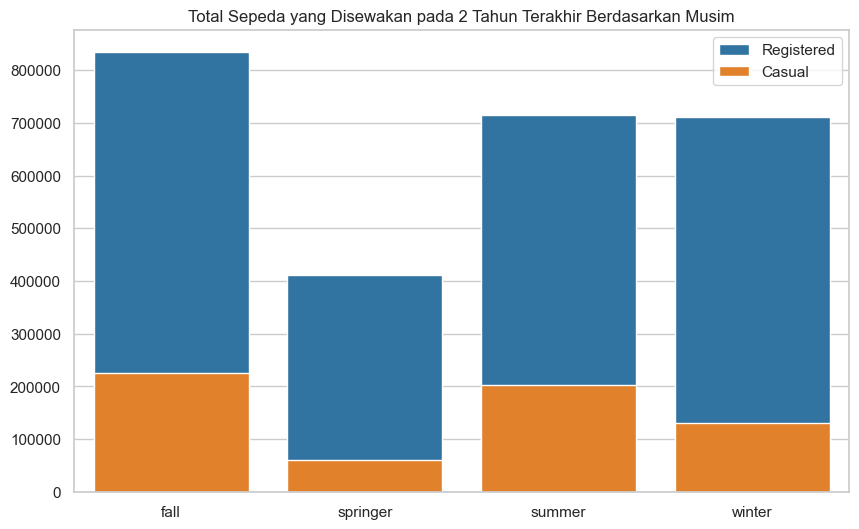

In [32]:
#membuat variabel total data pelanggan registered dan kasual setiap season
plot_season = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

# membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_season, 
    x='season', 
    y='registered', 
    label='Registered', 
    color='tab:blue'
)
sns.barplot(
    data=plot_season, 
    x='season', 
    y='casual', 
    label='Casual', 
    color='tab:orange'
)
plt.title('Total Sepeda yang Disewakan pada 2 Tahun Terakhir Berdasarkan Musim')
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.show()

Pada gambar plot dapat dilihat bahwa total penyewaan sepeda paling banyak terjadi pada musim fall baik untuk pelanggan casual maupun pelanggan yang sudah registered. Sebaliknya total penyewaaan sepeda paling sedikit terjadi pada musing springer. 

### Pertanyaan 3: Apakah pengaruh cuaca terhadap total sepeda yang dirental?

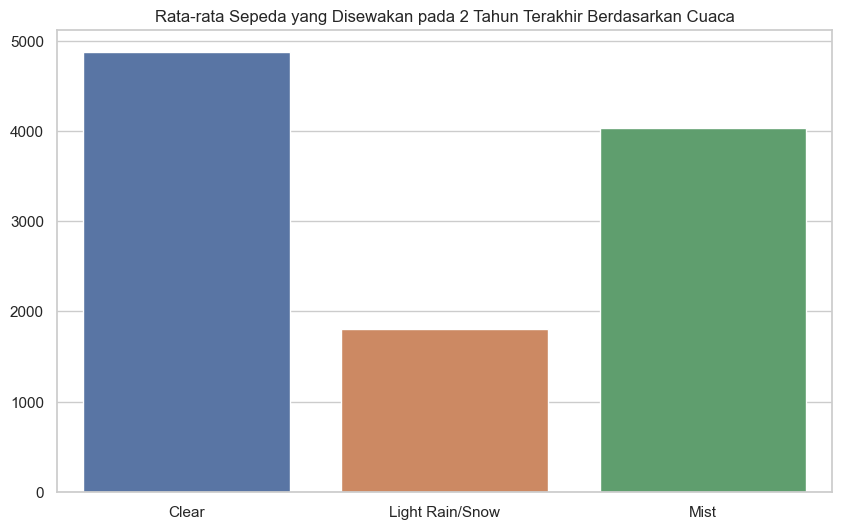

In [33]:
#membuat variabel total data pelanggan berdasarkan cuaca
plot_weather = day_df.groupby(by='weather').agg({
    'total': 'mean'
}).reset_index()

# membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_weather, 
    x='weather', 
    y='total'
)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Rata-rata Sepeda yang Disewakan pada 2 Tahun Terakhir Berdasarkan Cuaca')
plt.show()

Apabila dilihat pada hasil plot cuaca terhadap rata-rata sepeda yang disewakan, cuaca clear atau cerah menjadi kategori dengan rata-rata penyewaan terbanyak. perbedaan rata-rata penyewaan pada setiap kategori cuaca ini terlihat cukup signifikan yang membuktikan pengaruh cuaca yang cukup krusial terhadap minat pelanggan dalam menyewa sepeda.

### Pertanyaan 4: Jam berapa sepeda paling banyak disewa pada hari kerja dan hari libur?

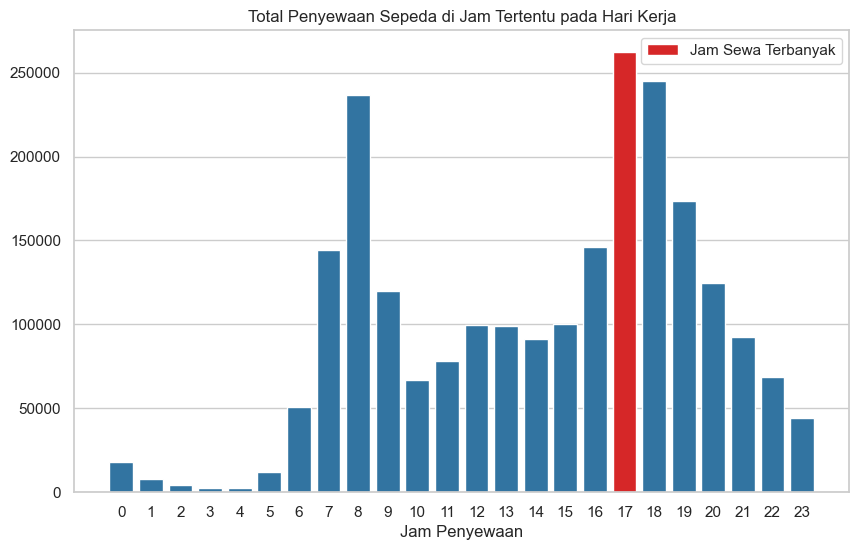

In [34]:
#membuat variabel total data pelanggan berdasarkan jam pada hari kerja
plot_hour_workingday = filter_workingday.groupby(by='hour').agg({
    'total': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))

# Menentukan indeks kolom dengan total terbesar
max_col = plot_hour_workingday['total'].idxmax()

# Membuat bar plot
sns.barplot(
    data=plot_hour_workingday, 
    x='hour', 
    y='total',
    color='tab:blue'
)
plt.bar(max_col, plot_hour_workingday.loc[max_col, 'total'], color='tab:red', label='Jam Sewa Terbanyak')

plt.title("Total Penyewaan Sepeda di Jam Tertentu pada Hari Kerja")
plt.xlabel('Jam Penyewaan')
plt.ylabel(None)
plt.legend()
plt.show()

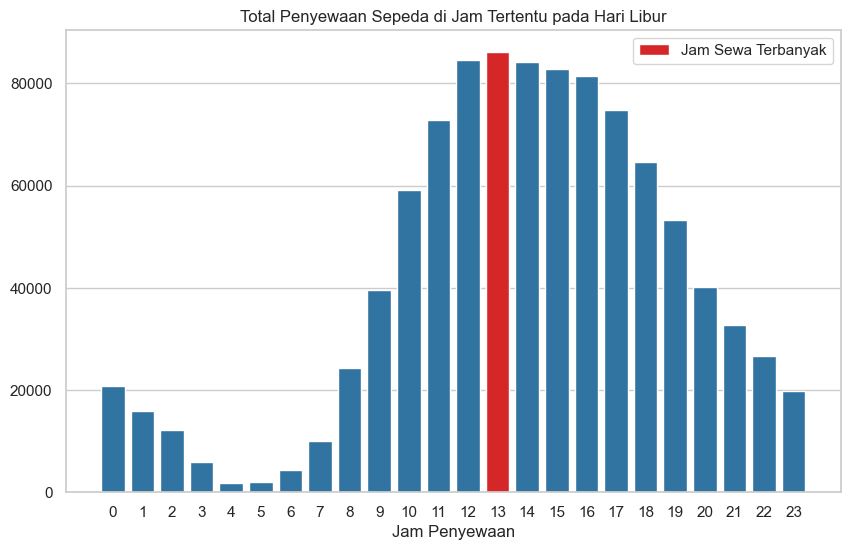

In [35]:
#membuat variabel total data pelanggan berdasarkan jam pada hari libur
plot_hour_holiday = filter_holiday.groupby(by='hour').agg({
    'total': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))

# Menentukan indeks kolom dengan total terbesar
max_col = plot_hour_holiday['total'].idxmax()

# Membuat bar plot
sns.barplot(
    data=plot_hour_holiday, 
    x='hour', 
    y='total',
    color='tab:blue'
)
plt.bar(max_col, plot_hour_holiday.loc[max_col, 'total'], color='tab:red', label='Jam Sewa Terbanyak')

plt.title("Total Penyewaan Sepeda di Jam Tertentu pada Hari Libur")
plt.xlabel('Jam Penyewaan')
plt.ylabel(None)
plt.legend()
plt.show()

Berdasarkan hasil plot dalam 2 tahun terakhir, jam penyewaan terbanyak pada hari kerja terjadi pada pukul 17.00 sore. Sedangkan untuk jam penyewaan terbanyak pada hari libur terjadi pada pukul 13.00 siang.

## Conclusion

- Pada 2 tahun terakhir secara keseluruhan performa penyewaan sepeda berada dalam tren yang positif
- Penyewaan sepeda terbanyak terjadi pada musim fall dan penyewaan sepeda paling sedikit terjadi pada musim summer.
- Cuaca memiliki pengaruh yang signifikan terhadap total sepeda yang disewakan. Pelanggan cenderung menyewa sepeda pada cuaca yang cerah maupun sedikit berawan
- Pada hari kerja pelanggan melakukan penyewaan terbanyak pada sore hari berkisar pada pukul 16.00 - 20.00 dan pada pagi hari berkisar pukul 07.00 - 09.00 dengan penyewaaan terbanyak pada pukul 17.00. Sedangkan untuk hari libur pelanggan lebih memilih untuk melakukan penyewaan pada siang hari bekisar pada pukul 12.00 - 16.00 dengan penyewaan terbanyak pada pukuk 13.00

## Menerapkan Teknik Analisis Lanjutan

### RFM Analysis

In [36]:
rfm_df = hour_df.groupby(by="hour", as_index=False).agg({
    "date": "max",
    "instant": "nunique",
    "total": "sum"
})

# mengganti nama kolom
rfm_df.columns = ["hour", "last_order_date", "order_count", "revenue"]

# perhitungan recency per hari
rfm_df["last_order_date"] = rfm_df["last_order_date"].dt.date
recent_date = hour_df["date"].dt.date.max()
rfm_df["recency"] = rfm_df["last_order_date"].apply(lambda x: (recent_date - x).days)

# Drop kolom 'last_order_date'
rfm_df.drop("last_order_date", axis=1, inplace=True)

rfm_df.head()

,hour,order_count,revenue,recency
0,0,726,39130,0
1,1,724,24164,0
2,2,715,16352,0
3,3,697,8174,0
4,4,697,4428,0


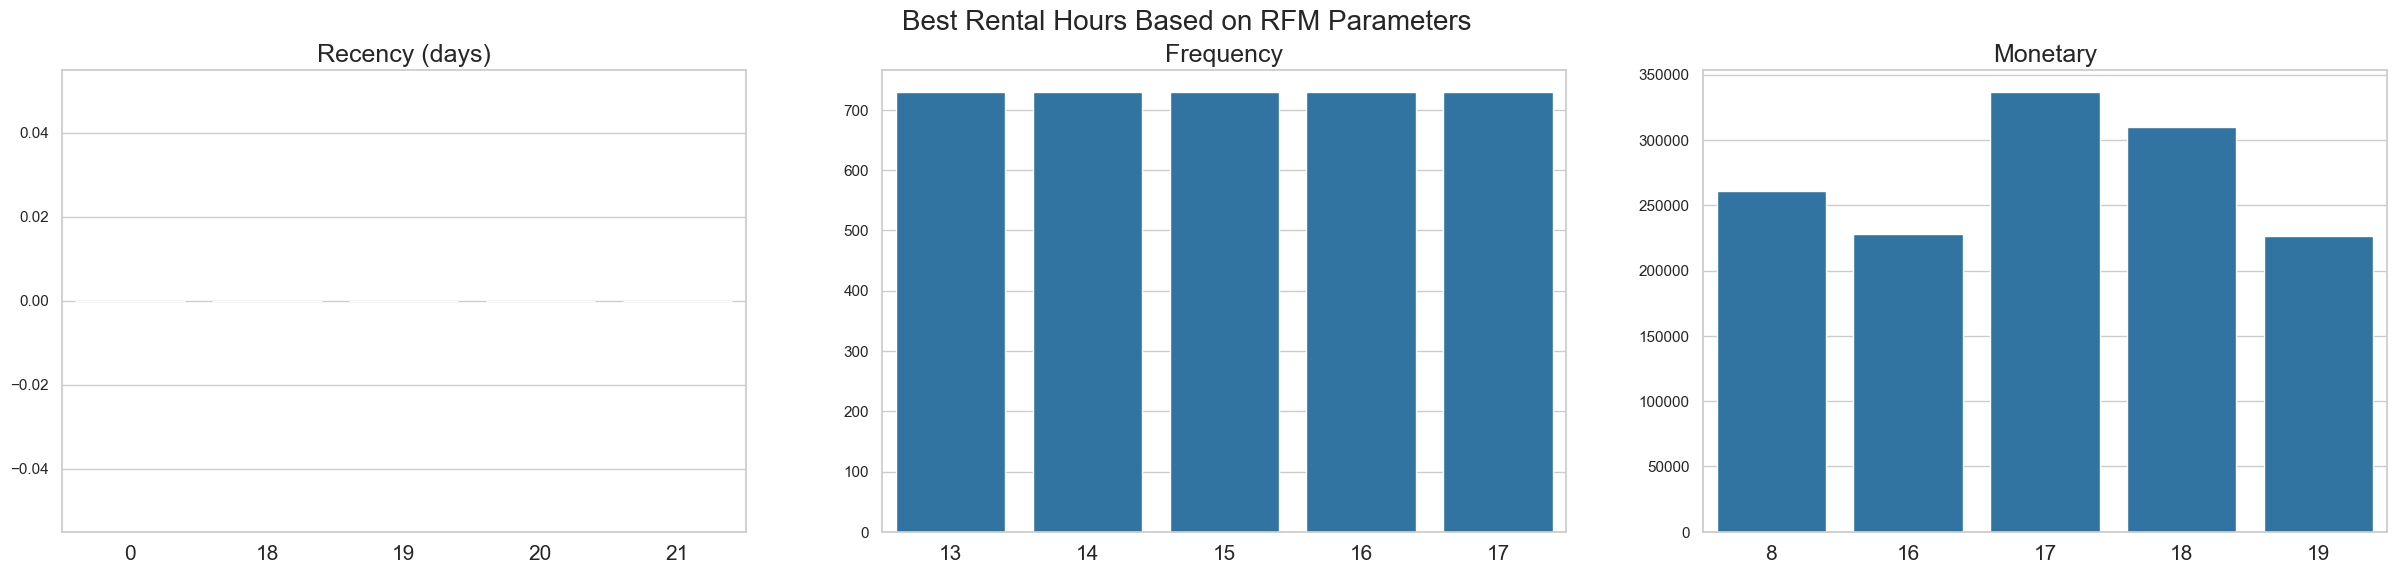

In [37]:
top_recency = rfm_df.sort_values(by="recency", ascending=True).head(5)
top_frequency = rfm_df.sort_values(by="order_count", ascending=False).head(5)
top_monetary = rfm_df.sort_values(by="revenue", ascending=False).head(5)

#membuat bar plot RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

#plot top recency
sns.barplot(
    data=top_recency, 
    x="hour", 
    y="recency",
    color='tab:blue',
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

#plot top frequency
sns.barplot(
    data=top_frequency,
    x="hour",
    y="order_count", 
    color='tab:blue',
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

#plot top monetary
sns.barplot(
    data=top_monetary, 
    x="hour", 
    y="revenue", 
    color='tab:blue',
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Rental Hours Based on RFM Parameters", fontsize=20)
plt.show()

In [38]:
hour_df.to_csv("main_data.csv", index=False)